In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

In [3]:
data.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [226]:
data.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clusters', 'sil_width'],
      dtype='object')

In [4]:
data.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
data.shape

(23066, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
 data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [8]:
data.duplicated().sum()
#noduplicates

0

In [9]:
data.isnull().sum()
#CTR,CPM,CPC columns has null values

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
data.drop(['Timestamp'], axis=1, inplace=True)

In [11]:
data

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.0
2,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.0
3,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.0
4,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN


Treating missing values in CPC, CTR and CPM using the formula given.

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

In [12]:
data.CPM=data['Spend']/data['Impressions']*1000

In [13]:
data.CPC=data['Spend']/data['Clicks']

In [14]:
data.CTR=data['Clicks']/data['Impressions']

In [15]:
data.isnull().sum()

InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InventoryType          23066 non-null  object 
 1   Ad - Length            23066 non-null  int64  
 2   Ad- Width              23066 non-null  int64  
 3   Ad Size                23066 non-null  int64  
 4   Ad Type                23066 non-null  object 
 5   Platform               23066 non-null  object 
 6   Device Type            23066 non-null  object 
 7   Format                 23066 non-null  object 
 8   Available_Impressions  23066 non-null  int64  
 9   Matched_Queries        23066 non-null  int64  
 10  Impressions            23066 non-null  int64  
 11  Clicks                 23066 non-null  int64  
 12  Spend                  23066 non-null  float64
 13  Fee                    23066 non-null  float64
 14  Revenue                23066 non-null  float64
 15  CT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Ad - Length'),
  Text(1, 0, 'Ad- Width'),
  Text(2, 0, 'Ad Size'),
  Text(3, 0, 'Available_Impressions'),
  Text(4, 0, 'Matched_Queries'),
  Text(5, 0, 'Impressions'),
  Text(6, 0, 'Clicks'),
  Text(7, 0, 'Spend'),
  Text(8, 0, 'Fee'),
  Text(9, 0, 'Revenue'),
  Text(10, 0, 'CTR'),
  Text(11, 0, 'CPM'),
  Text(12, 0, 'CPC')])

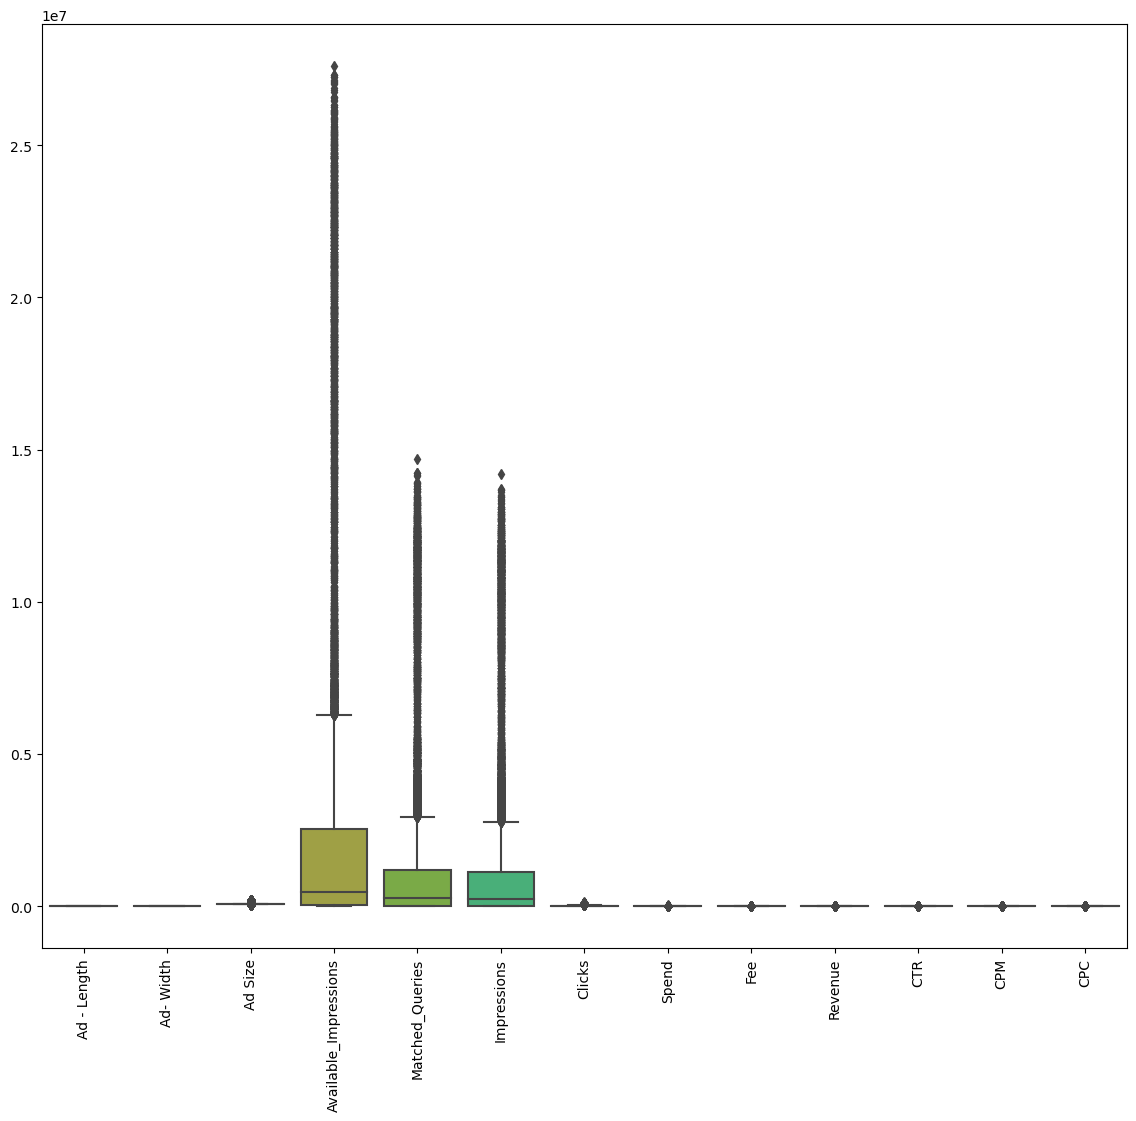

In [17]:
plt.figure(figsize=(14,12))
sns.boxplot(data=data)
plt.xticks(rotation=90)

<Axes: xlabel='Ad - Length'>

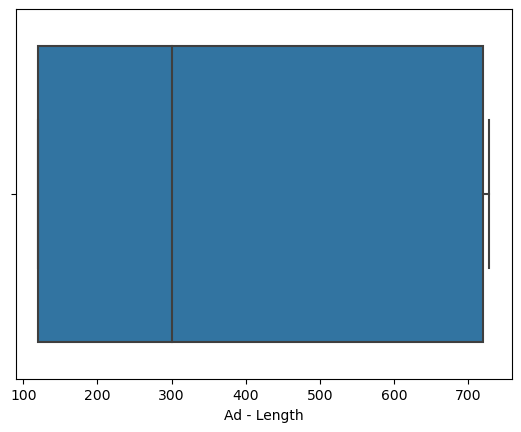

In [18]:
sns.boxplot(data=data,x='Ad - Length')


<Axes: xlabel='Ad- Width'>

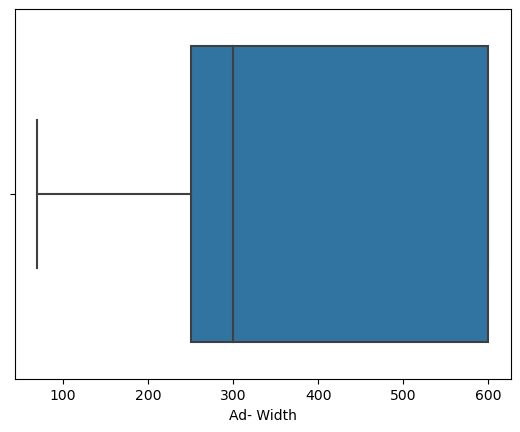

In [19]:
sns.boxplot(data=data,x='Ad- Width')


<Axes: xlabel='Ad Size'>

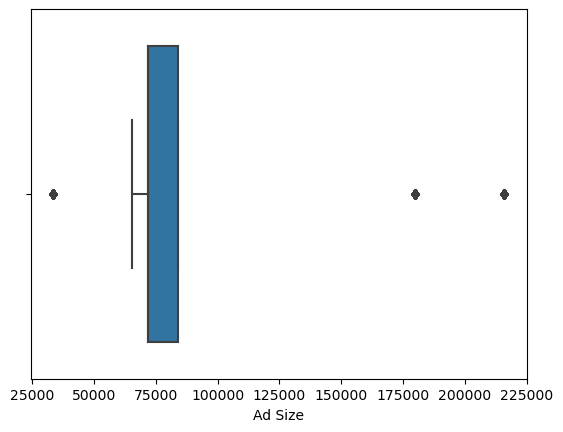

In [20]:
sns.boxplot(data=data,x='Ad Size')

<Axes: xlabel='Available_Impressions'>

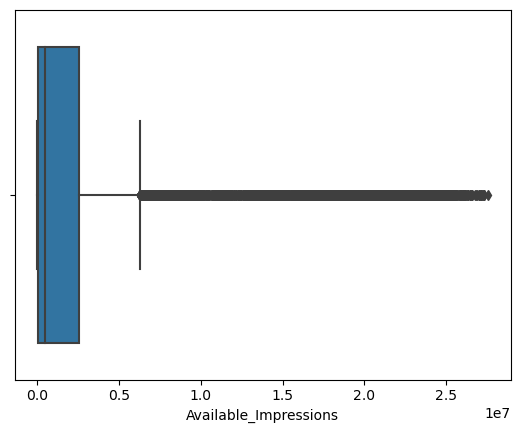

In [21]:
sns.boxplot(data=data,x='Available_Impressions')

<Axes: xlabel='Matched_Queries'>

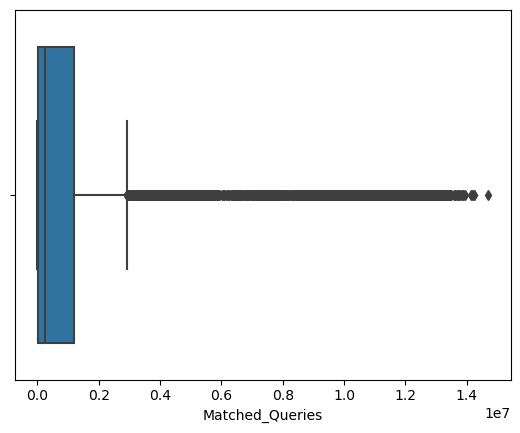

In [22]:
sns.boxplot(data=data,x='Matched_Queries')

<Axes: xlabel='Impressions'>

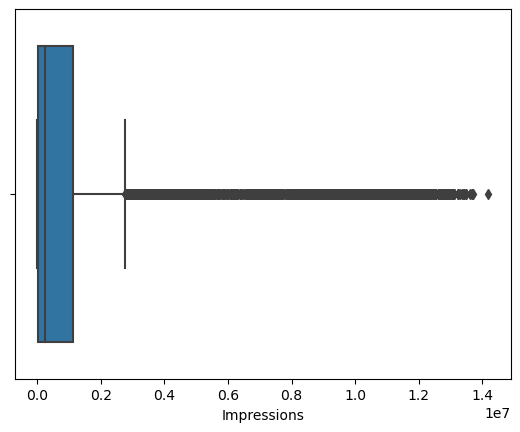

In [23]:
sns.boxplot(data=data,x='Impressions')

<Axes: xlabel='Clicks'>

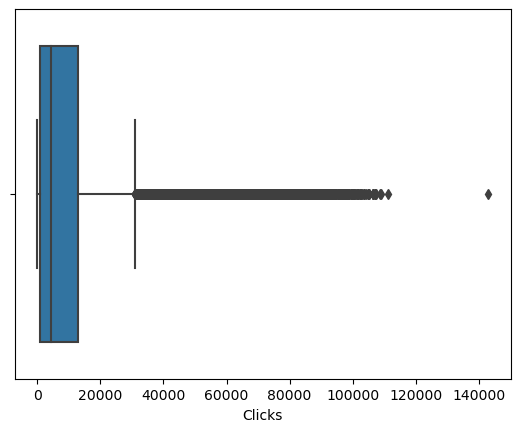

In [24]:
sns.boxplot(data=data,x='Clicks')

<Axes: xlabel='Spend'>

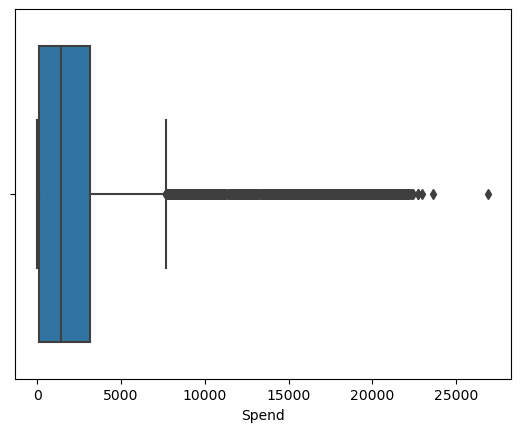

In [25]:
sns.boxplot(data=data,x='Spend')

<Axes: xlabel='Revenue'>

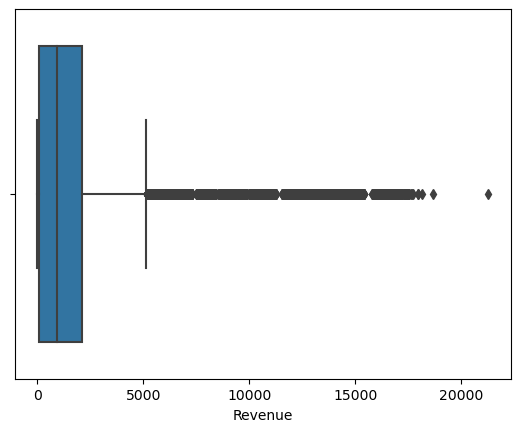

In [26]:
sns.boxplot(data=data,x='Revenue')

<Axes: xlabel='Fee'>

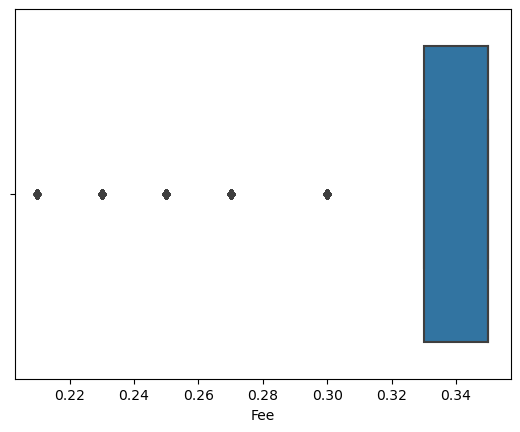

In [27]:
sns.boxplot(data=data,x='Fee')

<Axes: xlabel='CTR'>

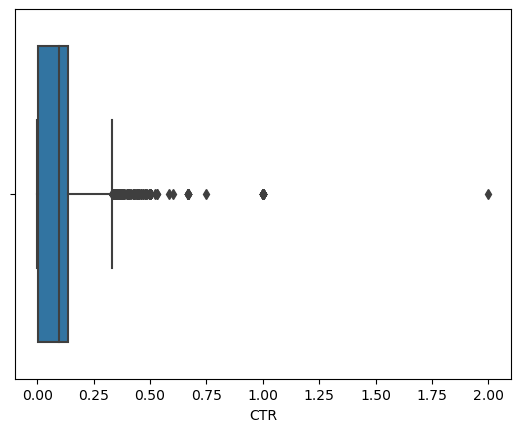

In [28]:
sns.boxplot(data=data,x='CTR')

<Axes: xlabel='CPM'>

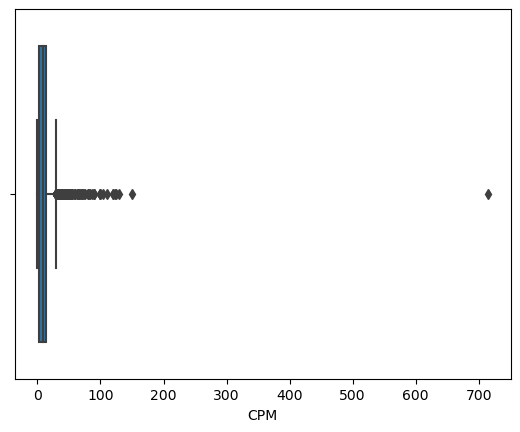

In [29]:
sns.boxplot(data=data,x='CPM')

<Axes: xlabel='CPC'>

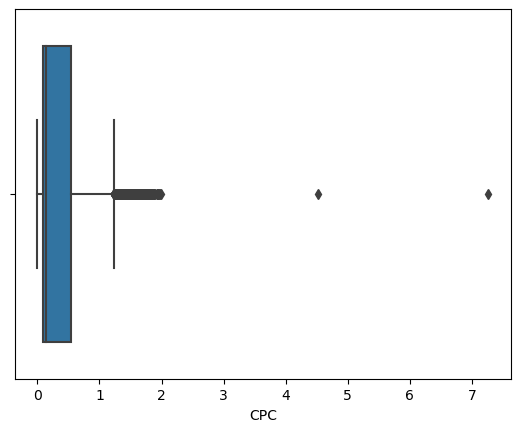

In [30]:
sns.boxplot(data=data,x='CPC')

In [31]:
def detectoutlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [32]:
lr, ur=detectoutlier(data['CPM'])

In [33]:
data['CPM']=np.where(data['CPM']>ur,ur,data['CPM'])
data['CPM']=np.where(data['CPM']<lr,lr,data['CPM'])

<Axes: xlabel='CPM'>

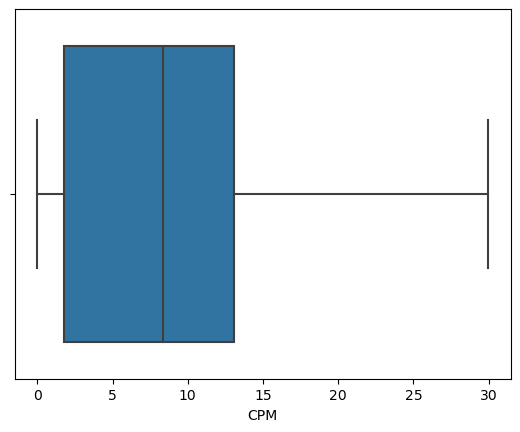

In [34]:
sns.boxplot(data=data,x='CPM')

In [35]:
lr, ur=detectoutlier(data['CPC'])

In [36]:
data['CPC']=np.where(data['CPC']>ur,ur,data['CPC'])
data['CPC']=np.where(data['CPC']<lr,lr,data['CPC'])

<Axes: xlabel='CPC'>

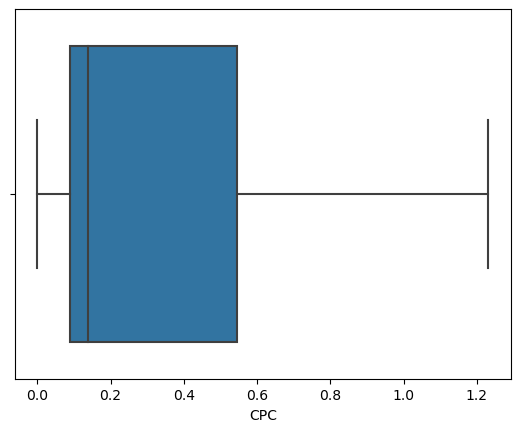

In [37]:
sns.boxplot(data=data,x='CPC')

In [38]:
lr, ur=detectoutlier(data['CTR'])

In [39]:
data['CTR']=np.where(data['CTR']>ur,ur,data['CTR'])
data['CTR']=np.where(data['CTR']<lr,lr,data['CTR'])

<Axes: xlabel='CTR'>

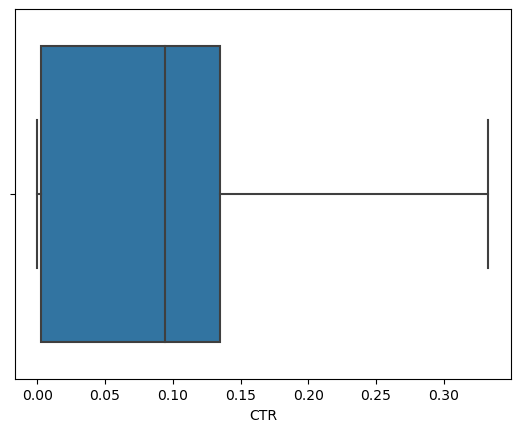

In [40]:
sns.boxplot(data=data,x='CTR')

<Axes: xlabel='Revenue'>

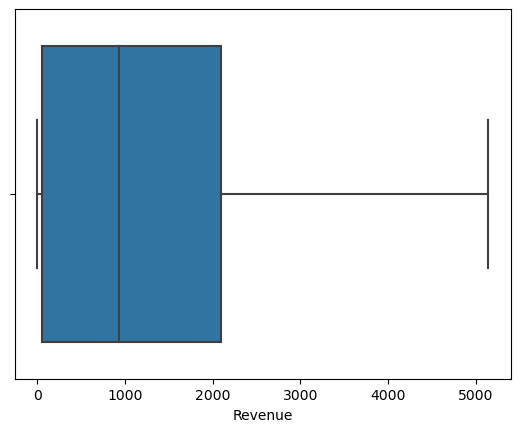

In [41]:
lr, ur=detectoutlier(data['Revenue'])
data['Revenue']=np.where(data['Revenue']>ur,ur,data['Revenue'])
data['Revenue']=np.where(data['Revenue']<lr,lr,data['Revenue'])
sns.boxplot(data=data,x='Revenue')

<Axes: xlabel='Fee'>

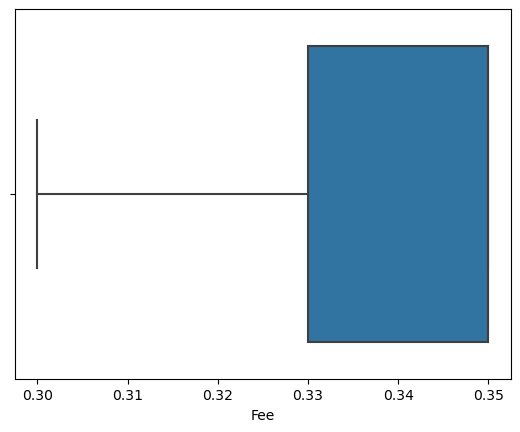

In [42]:
lr, ur=detectoutlier(data['Fee'])
data['Fee']=np.where(data['Fee']>ur,ur,data['Fee'])
data['Fee']=np.where(data['Fee']<lr,lr,data['Fee'])
sns.boxplot(data=data,x='Fee')

<Axes: xlabel='Spend'>

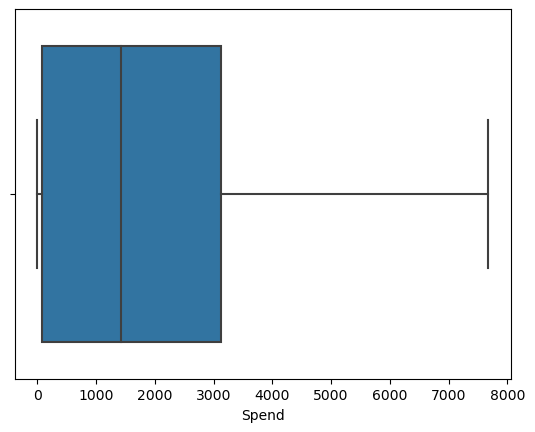

In [43]:
lr, ur=detectoutlier(data['Spend'])
data['Spend']=np.where(data['Spend']>ur,ur,data['Spend'])
data['Spend']=np.where(data['Spend']<lr,lr,data['Spend'])
sns.boxplot(data=data,x='Spend')

<Axes: xlabel='Clicks'>

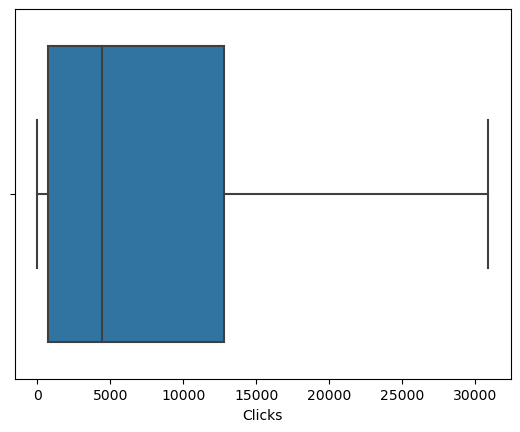

In [44]:
lr, ur=detectoutlier(data['Clicks'])
data['Clicks']=np.where(data['Clicks']>ur,ur,data['Clicks'])
data['Clicks']=np.where(data['Clicks']<lr,lr,data['Clicks'])
sns.boxplot(data=data,x='Clicks')

<Axes: xlabel='Impressions'>

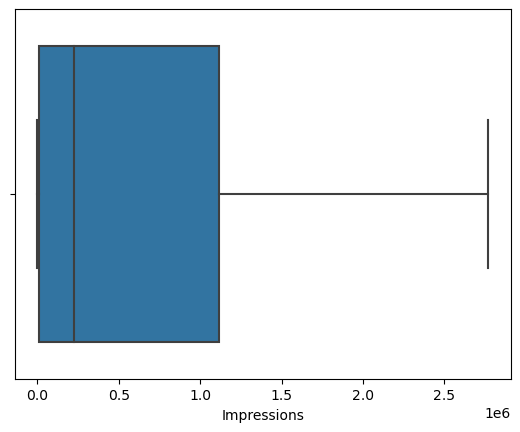

In [45]:
lr, ur=detectoutlier(data['Impressions'])
data['Impressions']=np.where(data['Impressions']>ur,ur,data['Impressions'])
data['Impressions']=np.where(data['Impressions']<lr,lr,data['Impressions'])
sns.boxplot(data=data,x='Impressions')

<Axes: xlabel='Matched_Queries'>

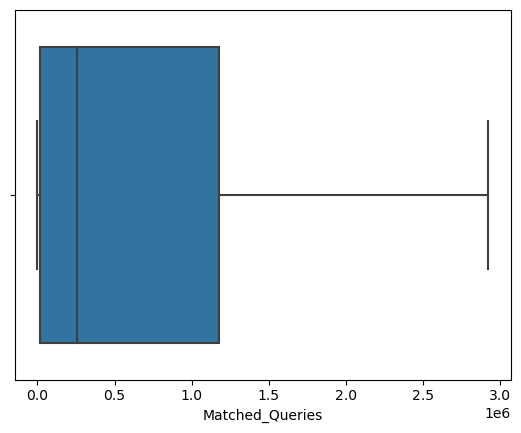

In [46]:
lr, ur=detectoutlier(data['Matched_Queries'])
data['Matched_Queries']=np.where(data['Matched_Queries']>ur,ur,data['Matched_Queries'])
data['Matched_Queries']=np.where(data['Matched_Queries']<lr,lr,data['Matched_Queries'])
sns.boxplot(data=data,x='Matched_Queries')

<Axes: xlabel='Available_Impressions'>

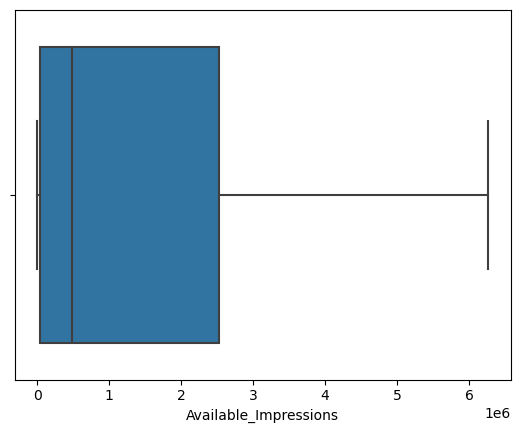

In [47]:
lr, ur=detectoutlier(data['Available_Impressions'])
data['Available_Impressions']=np.where(data['Available_Impressions']>ur,ur,data['Available_Impressions'])
data['Available_Impressions']=np.where(data['Available_Impressions']<lr,lr,data['Available_Impressions'])
sns.boxplot(data=data,x='Available_Impressions')

<Axes: xlabel='Ad Size'>

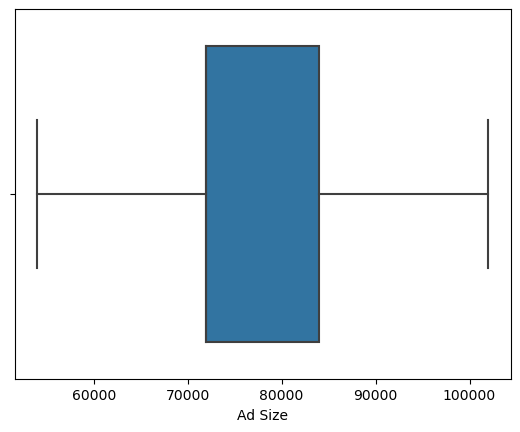

In [48]:
lr, ur=detectoutlier(data['Ad Size'])
data['Ad Size']=np.where(data['Ad Size']>ur,ur,data['Ad Size'])
data['Ad Size']=np.where(data['Ad Size']<lr,lr,data['Ad Size'])
sns.boxplot(data=data,x='Ad Size')

In [49]:
from scipy.stats import zscore

In [50]:
cat=[]
num=[]

In [51]:
for i in data.columns:
    if data[i].dtype=='object':
        cat.append(i)
    else:
          num.append(i)

In [52]:
cat

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [53]:
df=data[num].apply(zscore)


In [54]:
df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.893170,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.893170,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.893170,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.893170,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.893170,0.535724,-0.880093,-0.946281,-1.194498,-1.042561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435
23062,1.433093,-0.186599,1.652896,-0.756181,-0.779264,-0.768805,-0.867488,-0.893154,0.535724,-0.880078,3.035808,1.712113,-0.916204
23063,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893150,0.535724,-0.880074,3.035808,3.162718,-0.884614
23064,-1.134891,1.290590,-0.297564,-0.756179,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435


In [55]:
# Creating Clusters using KMeans

In [56]:
df2=data[['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']].copy()

In [57]:
df2

,InventoryType,Ad Type,Platform,Device Type,Format
0,Format1,Inter222,Video,Desktop,Display
1,Format1,Inter227,App,Mobile,Video
2,Format1,Inter222,Video,Desktop,Display
3,Format1,Inter228,Video,Mobile,Video
4,Format1,Inter217,Web,Desktop,Video
...,...,...,...,...,...
23061,Format5,Inter220,Web,Mobile,Video
23062,Format5,Inter224,Web,Desktop,Video
23063,Format5,Inter218,App,Mobile,Video
23064,Format4,inter230,Video,Mobile,Video


In [58]:
data.drop(['InventoryType'],axis=1,inplace=True)
data.drop(['Ad Type'],axis=1,inplace=True)
data.drop(['Platform'],axis=1,inplace=True)
data.drop(['Device Type'],axis=1,inplace=True)
data.drop(['Format'],axis=1,inplace=True)

In [59]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
scaleddf=x.fit_transform(data)

In [60]:
scaleddf


array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

In [61]:
#choosing random cluster
#taking k=2

In [62]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)
k_means.fit(scaleddf)

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [63]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [64]:
k_means.inertia_

183349.11866292194

In [65]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


140536.26185820205

In [66]:
k_means=KMeans(n_clusters=1)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


299858.00000000023

In [67]:
k_means=KMeans(n_clusters=4)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


95133.93066619671

In [68]:
k_means=KMeans(n_clusters=5)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


61539.18919785388

In [227]:
k_means=KMeans(n_clusters=6)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


51676.892307099595

In [228]:
k_means=KMeans(n_clusters=7)
k_means.fit(scaleddf)
k_means.inertia_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


45136.309125344436

In [69]:
#lets visualise the elbow point

In [70]:
wss=[]

In [71]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(scaleddf)
    wss.append(KM.inertia_)

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/p

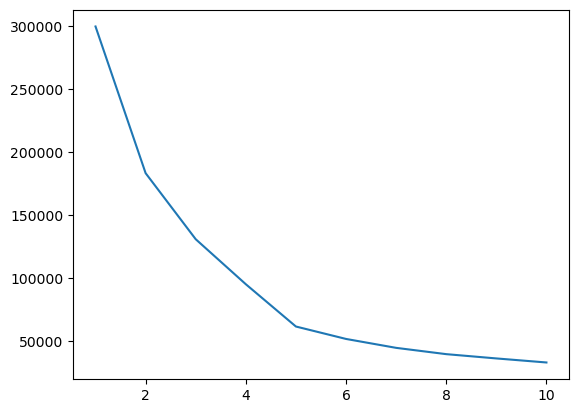

In [72]:
plt.plot(range(1,11),wss)

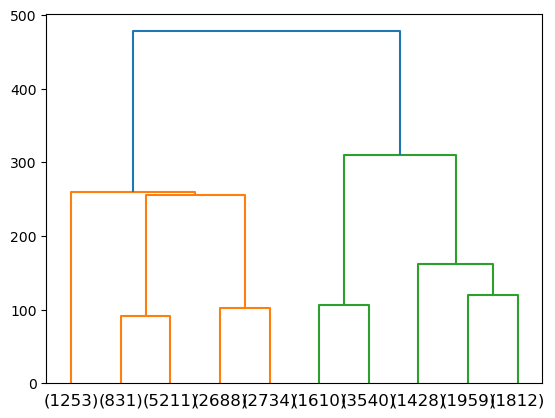

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink=linkage(scaleddf,method='ward',metric='euclidean')
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [74]:
k_means=KMeans(n_clusters=4)
k_means.fit(scaleddf)

labels=k_means.labels_

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
data['Clusters']=labels

In [76]:
data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters
0,300,250,75000.0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.003096,0.000000,0.00,1
1,300,250,75000.0,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.003509,0.000000,0.00,1
2,300,250,75000.0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.002817,0.000000,0.00,1
3,300,250,75000.0,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.002020,0.000000,0.00,1
4,300,250,75000.0,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.004132,0.000000,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,102000.0,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.332788,29.981418,0.07,2
23062,720,300,102000.0,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.332788,20.000000,0.04,2
23063,720,300,102000.0,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.332788,29.981418,0.05,2
23064,120,600,72000.0,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.332788,29.981418,0.07,2


In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [78]:
silhouette_score(scaleddf,labels)

0.44534519247649873

In [79]:
sil_width=silhouette_samples(scaleddf,labels)

In [80]:
data['sil_width']=sil_width

In [81]:
data.to_csv('km.xlsx')

In [82]:
data.Clusters.value_counts().sort_index()
clust_profile=data.groupby('Clusters').mean()
clust_profile['freq']=data.Clusters.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,sil_width,freq
Clusters,,,,,,,,,,,,,,,
0,145.392650,570.277240,73907.156673,8.025707e+05,5.641802e+05,4.759313e+05,30551.916344,6522.059774,0.305764,4454.785247,0.137587,15.397786,0.111971,0.681694,1551
1,423.971442,144.004543,63625.020282,1.812893e+06,8.662461e+05,8.282049e+05,3256.069609,1502.278355,0.349267,978.838843,0.004028,1.786078,0.529599,0.507415,6163
2,368.043209,461.545954,85302.904197,1.374760e+05,7.477135e+04,6.229995e+04,6954.156267,647.116196,0.349828,421.191764,0.146071,13.131697,0.100728,0.363854,11294
3,465.513061,199.411040,72981.586989,5.693098e+06,2.805313e+06,2.670479e+06,11239.989897,5736.706676,0.313297,3876.959415,0.002173,1.573353,0.748490,0.487546,4058


In [83]:
Finaldf=pd.concat([data,df2],axis=1)

In [84]:
Finaldf

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters,sil_width,InventoryType,Ad Type,Platform,Device Type,Format
0,300,250,75000.0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.003096,0.000000,0.00,1,0.186675,Format1,Inter222,Video,Desktop,Display
1,300,250,75000.0,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.003509,0.000000,0.00,1,0.186170,Format1,Inter227,App,Mobile,Video
2,300,250,75000.0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.002817,0.000000,0.00,1,0.187042,Format1,Inter222,Video,Desktop,Display
3,300,250,75000.0,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.002020,0.000000,0.00,1,0.187983,Format1,Inter228,Video,Mobile,Video
4,300,250,75000.0,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.004132,0.000000,0.00,1,0.185377,Format1,Inter217,Web,Desktop,Video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,102000.0,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.332788,29.981418,0.07,2,0.354109,Format5,Inter220,Web,Mobile,Video
23062,720,300,102000.0,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.332788,20.000000,0.04,2,0.373110,Format5,Inter224,Web,Desktop,Video
23063,720,300,102000.0,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.332788,29.981418,0.05,2,0.355048,Format5,Inter218,App,Mobile,Video
23064,120,600,72000.0,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.332788,29.981418,0.07,2,0.359744,Format4,inter230,Video,Mobile,Video


In [85]:
result = Finaldf.groupby(['Clusters'])['Device Type'].value_counts()

In [86]:
result

Clusters  Device Type
0         Mobile          990
          Desktop         561
1         Mobile         3977
          Desktop        2186
2         Mobile         7248
          Desktop        4046
3         Mobile         2591
          Desktop        1467
Name: Device Type, dtype: int64

[Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [87]:
result = Finaldf.groupby(['Clusters'])['CPC'].mean()
result

Clusters
0    0.111971
1    0.529599
2    0.100728
3    0.748490
Name: CPC, dtype: float64

In [88]:
result = Finaldf.groupby(['Clusters'])['Spend'].mean()
result

Clusters
0    6522.059774
1    1502.278355
2     647.116196
3    5736.706676
Name: Spend, dtype: float64

In [89]:
result = Finaldf.groupby(['Clusters'])['Revenue'].mean()
result

Clusters
0    4454.785247
1     978.838843
2     421.191764
3    3876.959415
Name: Revenue, dtype: float64

In [90]:
result = Finaldf.groupby(['Clusters'])['Clicks'].mean()
result

Clusters
0    30551.916344
1     3256.069609
2     6954.156267
3    11239.989897
Name: Clicks, dtype: float64

In [91]:
result = Finaldf.groupby(['Clusters'])['CTR'].mean()
result

Clusters
0    0.137587
1    0.004028
2    0.146071
3    0.002173
Name: CTR, dtype: float64

In [231]:
result = Finaldf.groupby(['Clusters'])['CPM'].mean()
result

Clusters
0    15.397786
1     1.786078
2    13.131697
3     1.573353
Name: CPM, dtype: float64

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/808059352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Clicks']


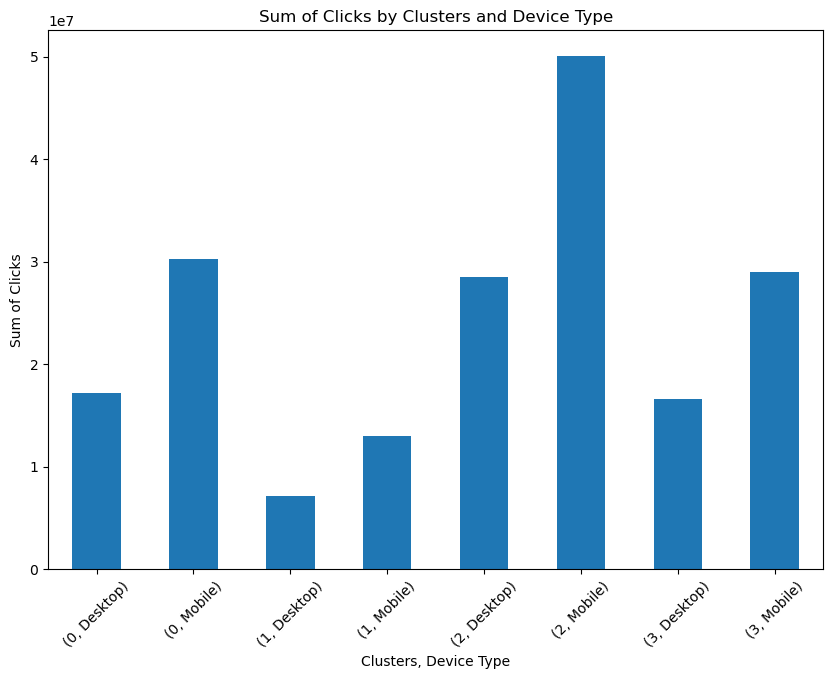

In [93]:

result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Clicks']
result.plot(kind='bar', figsize=(10, 7))

plt.xlabel('Clusters, Device Type')
plt.ylabel('Sum of Clicks')
plt.title('Sum of Clicks by Clusters and Device Type')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability

plt.show()


/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/380036822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Spend']


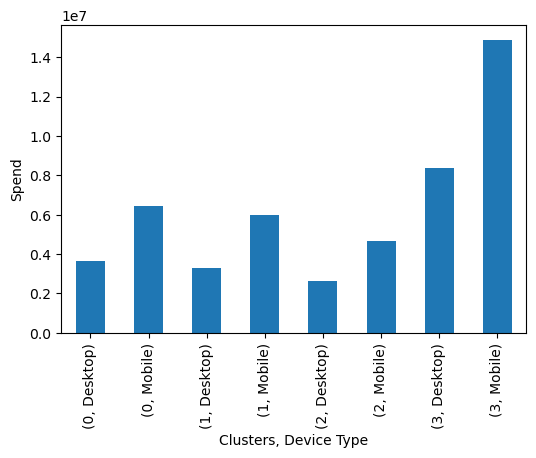

In [229]:
result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Spend']
result.plot(kind='bar', figsize=(6, 4))

plt.xlabel('Clusters, Device Type')
plt.ylabel('Spend')
plt.show()


/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/2098454167.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Revenue']


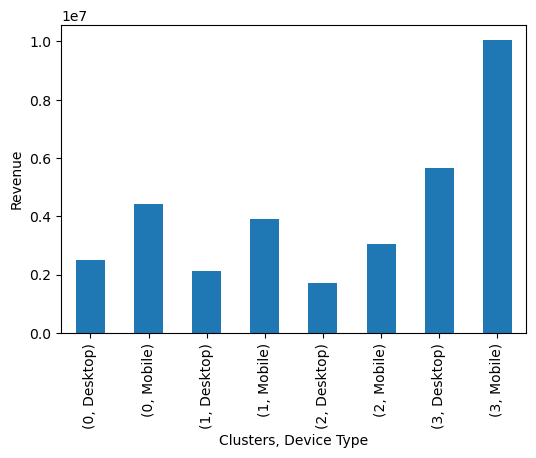

In [230]:
result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['Revenue']
result.plot(kind='bar', figsize=(6, 4))

plt.xlabel('Clusters, Device Type')
plt.ylabel('Revenue')
plt.show()

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/14725166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CPM']


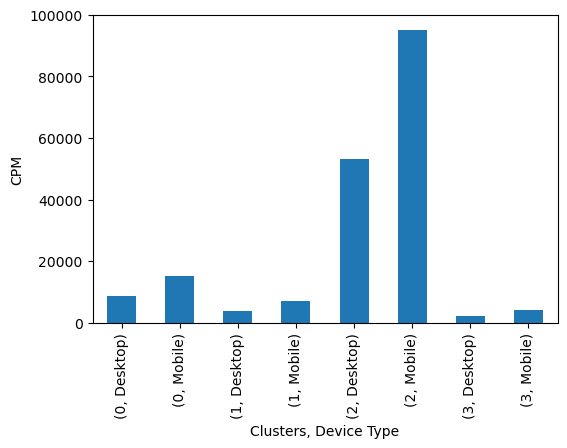

In [233]:
result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CPM']
result.plot(kind='bar', figsize=(6, 4))

plt.xlabel('Clusters, Device Type')
plt.ylabel('CPM')
plt.show()

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/1414510246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CTR']


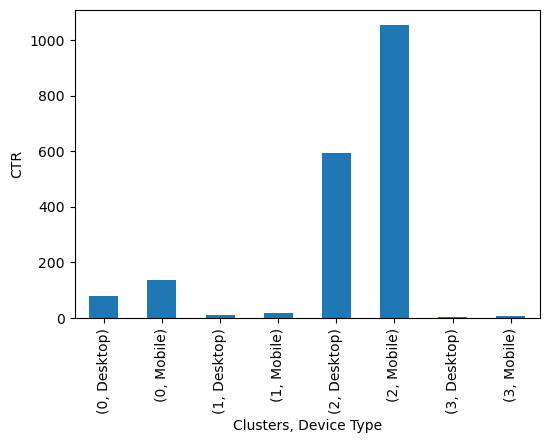

In [234]:
result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CTR']
result.plot(kind='bar', figsize=(6, 4))

plt.xlabel('Clusters, Device Type')
plt.ylabel('CTR')
plt.show()

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/245941769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CPC']


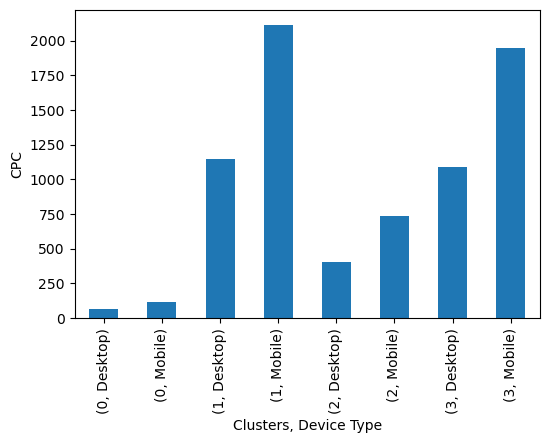

In [235]:
result = Finaldf.groupby(['Clusters', 'Device Type']).sum()['CPC']
result.plot(kind='bar', figsize=(6,4))

plt.xlabel('Clusters, Device Type')
plt.ylabel('CPC')
plt.show()

Problem:2

In [99]:
PCA=pd.read_excel('PCA India Data_Census.xlsx')

In [100]:
PCA.shape

(640, 61)

In [101]:
PCA.head(10)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
5,1,6,Jammu & Kashmir,Rajouri,16345,25290,37426,6155,5294,2588,...,1808,3536,1277,2374,229,256,19,71,283,835
6,1,7,Jammu & Kashmir,Kathua,12510,22793,30491,3928,3200,5357,...,502,561,160,283,133,120,11,19,198,139
7,1,8,Jammu & Kashmir,Baramula,9414,22960,30509,4246,4099,0,...,849,878,168,321,385,265,50,94,246,198
8,1,9,Jammu & Kashmir,Bandipore,3814,10319,13058,1646,1779,0,...,515,901,108,280,218,234,49,144,140,243
9,1,10,Jammu & Kashmir,Srinagar,15095,39014,52278,6269,5704,11,...,308,432,10,29,36,22,16,134,246,247


In [102]:
PCA.tail(10)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
630,33,631,Tamil Nadu,Krishnagiri,65952,82958,134294,10629,10083,13602,...,1027,2295,101,140,341,1139,76,223,509,793
631,33,632,Tamil Nadu,Coimbatore,133255,125297,239223,12101,11624,21087,...,723,2137,8,46,115,664,37,225,563,1202
632,33,633,Tamil Nadu,Tiruppur,98258,77174,163526,7201,6957,13016,...,401,1574,5,29,69,499,17,171,310,875
633,34,634,Puducherry,Yanam,2219,2618,4659,281,275,496,...,11,30,0,0,3,11,0,1,8,18
634,34,635,Puducherry,Puducherry,37786,47268,80943,5629,5407,10062,...,528,951,10,14,180,503,11,46,327,388
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [103]:
PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [104]:
PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [105]:
PCA.duplicated().sum()

0

In [106]:
PCA.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

TOT_M,TOT_F,M_LIT,F_LIT,TOT_WORK_M

Which state has the highest total male population?

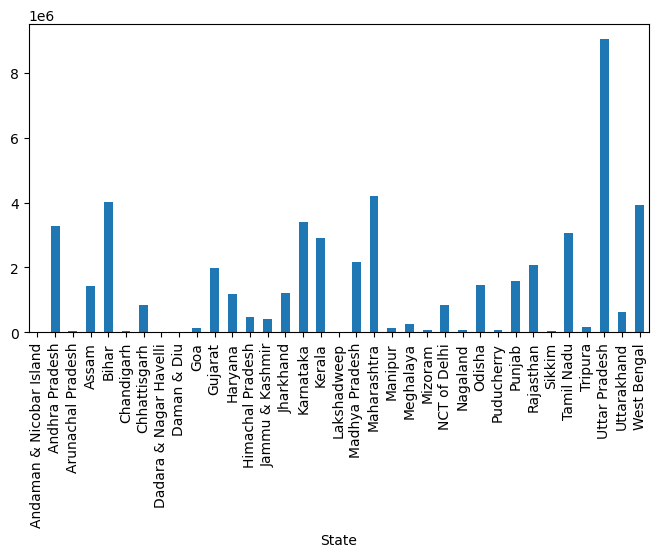

In [107]:
tolm = PCA.groupby(['State'])['TOT_M'].sum()
tolm.plot(kind='bar', figsize=(8, 4))


plt.show()

Which state has the highest total female population?

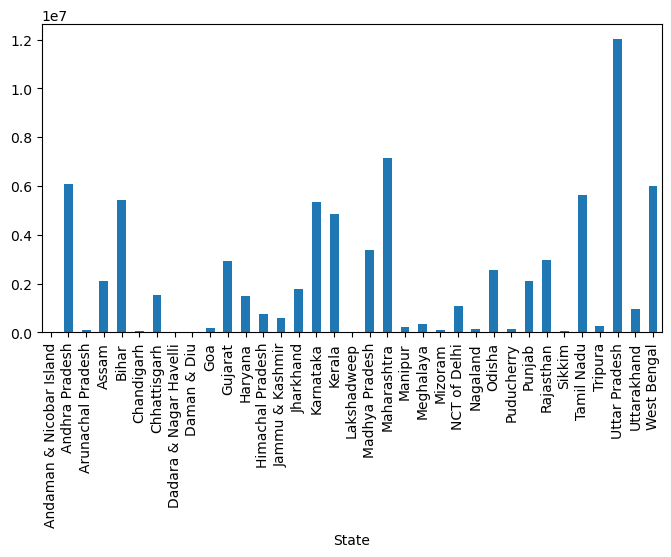

In [108]:
tolf = PCA.groupby(['State'])['TOT_F'].sum()
tolf.plot(kind='bar', figsize=(8, 4))


plt.show()

In [109]:
tolm/tolf

State
Andaman & Nicobar Island    0.652679
Andhra Pradesh              0.537024
Arunachal Pradesh           0.574365
Assam                       0.686561
Bihar                       0.744596
Chandigarh                  0.700037
Chhattisgarh                0.549200
Dadara & Nagar Havelli      0.644631
Daman & Diu                 0.703143
Goa                         0.621648
Gujarat                     0.674844
Haryana                     0.779129
Himachal Pradesh            0.642741
Jammu & Kashmir             0.735154
Jharkhand                   0.681804
Karnataka                   0.637802
Kerala                      0.601238
Lakshadweep                 0.868061
Madhya Pradesh              0.639695
Maharashtra                 0.587812
Manipur                     0.641179
Meghalaya                   0.752160
Mizoram                     0.623634
NCT of Delhi                0.775077
Nagaland                    0.583682
Odisha                      0.575500
Puducherry                  0.59

Andra:lowest, Lakshadweep:highest gender ratio.

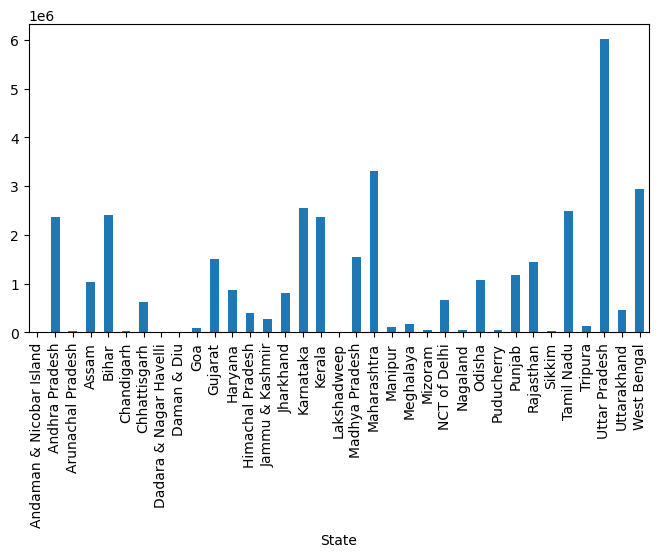

In [110]:
litm = PCA.groupby(['State'])['M_LIT'].sum()
litm.plot(kind='bar', figsize=(8, 4))


plt.show()

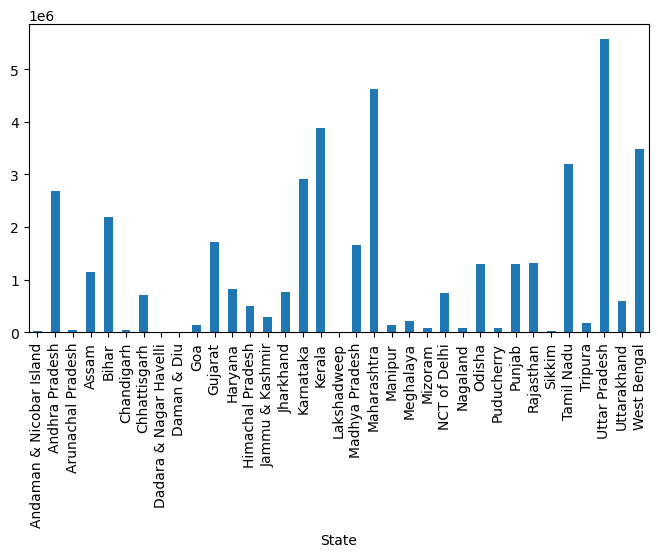

In [111]:
litf = PCA.groupby(['State'])['F_LIT'].sum()
litf.plot(kind='bar', figsize=(8, 4))


plt.show()

In [112]:
litm/tolm

State
Andaman & Nicobar Island    0.827085
Andhra Pradesh              0.724712
Arunachal Pradesh           0.671484
Assam                       0.711972
Bihar                       0.598354
Chandigarh                  0.803583
Chhattisgarh                0.733391
Dadara & Nagar Havelli      0.733171
Daman & Diu                 0.827188
Goa                         0.835282
Gujarat                     0.760907
Haryana                     0.749246
Himachal Pradesh            0.802359
Jammu & Kashmir             0.672121
Jharkhand                   0.665078
Karnataka                   0.749135
Kerala                      0.811806
Lakshadweep                 0.826718
Madhya Pradesh              0.713084
Maharashtra                 0.788496
Manipur                     0.757676
Meghalaya                   0.610784
Mizoram                     0.814862
NCT of Delhi                0.791835
Nagaland                    0.759543
Odisha                      0.737274
Puducherry                  0.82

Goa: highest literacy rate in male popn.Bihar : lowest

In [113]:
litf/tolf

State
Andaman & Nicobar Island    0.705343
Andhra Pradesh              0.439314
Arunachal Pradesh           0.514466
Assam                       0.550760
Bihar                       0.406581
Chandigarh                  0.728288
Chhattisgarh                0.461043
Dadara & Nagar Havelli      0.490075
Daman & Diu                 0.669304
Goa                         0.730168
Gujarat                     0.586118
Haryana                     0.551532
Himachal Pradesh            0.654789
Jammu & Kashmir             0.502746
Jharkhand                   0.435937
Karnataka                   0.543499
Kerala                      0.798583
Lakshadweep                 0.767262
Madhya Pradesh              0.491609
Maharashtra                 0.647051
Manipur                     0.589823
Meghalaya                   0.617477
Mizoram                     0.831862
NCT of Delhi                0.690211
Nagaland                    0.669607
Odisha                      0.510190
Puducherry                  0.65

Jharkhand and Andra Pradesh: lowest, Mizoram:highest

In [114]:
litf/litm

State
Andaman & Nicobar Island    1.306624
Andhra Pradesh              1.128797
Arunachal Pradesh           1.333932
Assam                       1.126733
Bihar                       0.912576
Chandigarh                  1.294647
Chhattisgarh                1.144658
Dadara & Nagar Havelli      1.036921
Daman & Diu                 1.150735
Goa                         1.406194
Gujarat                     1.141432
Haryana                     0.944792
Himachal Pradesh            1.269688
Jammu & Kashmir             1.017474
Jharkhand                   0.961372
Karnataka                   1.137504
Kerala                      1.636144
Lakshadweep                 1.069144
Madhya Pradesh              1.077721
Maharashtra                 1.396048
Manipur                     1.214112
Meghalaya                   1.344074
Mizoram                     1.636956
NCT of Delhi                1.124611
Nagaland                    1.510397
Odisha                      1.202426
Puducherry                  1.34

States with highest female literate:Mizoram and kerala. Lowest female literates: Rajasthan

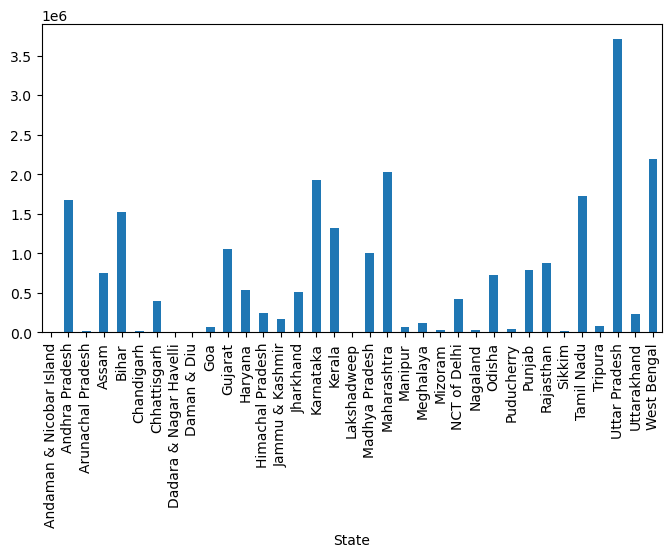

In [122]:
Work_M = PCA.groupby(['State'])['TOT_WORK_M'].sum()
Work_M.plot(kind='bar', figsize=(8, 4))


plt.show()

In [123]:
Work_M/tolm

State
Andaman & Nicobar Island    0.521574
Andhra Pradesh              0.511402
Arunachal Pradesh           0.313175
Assam                       0.517925
Bihar                       0.378752
Chandigarh                  0.497545
Chhattisgarh                0.475827
Dadara & Nagar Havelli      0.449441
Daman & Diu                 0.523379
Goa                         0.530228
Gujarat                     0.533240
Haryana                     0.455045
Himachal Pradesh            0.498094
Jammu & Kashmir             0.400671
Jharkhand                   0.428624
Karnataka                   0.566902
Kerala                      0.451731
Lakshadweep                 0.398893
Madhya Pradesh              0.466058
Maharashtra                 0.483453
Manipur                     0.457443
Meghalaya                   0.435714
Mizoram                     0.452733
NCT of Delhi                0.513097
Nagaland                    0.420224
Odisha                      0.492886
Puducherry                  0.51

Checking for outliers

<Axes: xlabel='TOT_M'>

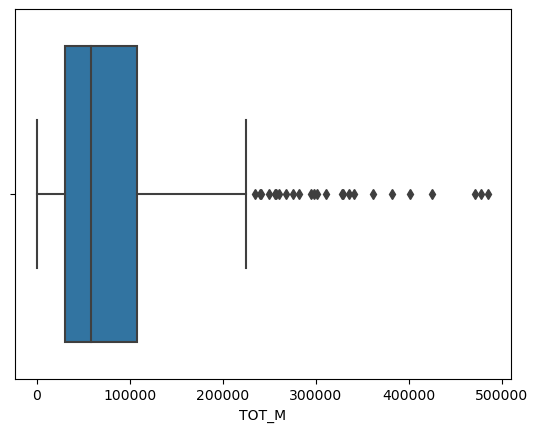

In [116]:
sns.boxplot(data=PCA,x='TOT_M')

<Axes: xlabel='TOT_F'>

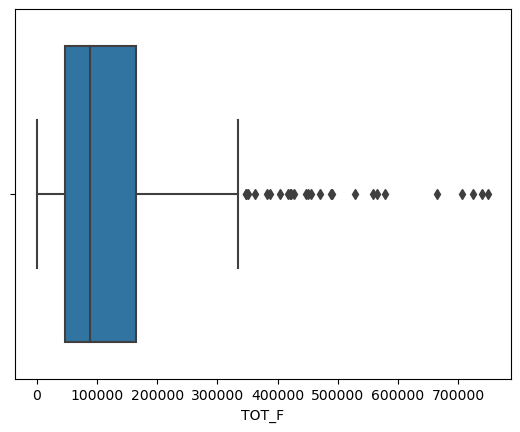

In [117]:
sns.boxplot(data=PCA,x='TOT_F')

<Axes: xlabel='M_LIT'>

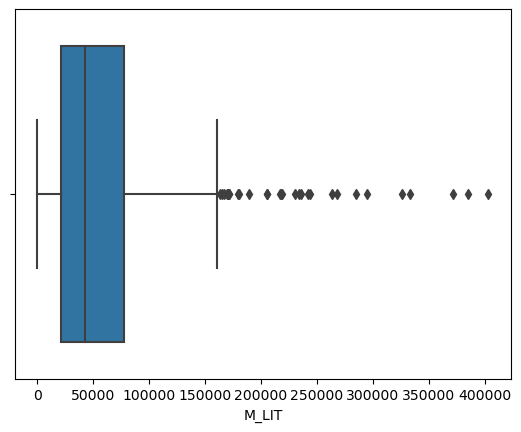

In [118]:
sns.boxplot(data=PCA,x='M_LIT')

<Axes: xlabel='F_LIT'>

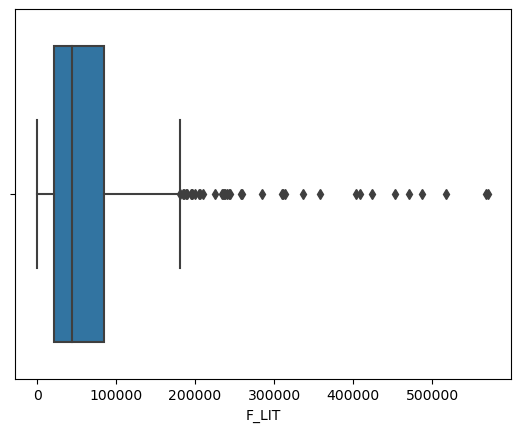

In [119]:
sns.boxplot(data=PCA,x='F_LIT')

<Axes: xlabel='TOT_WORK_M'>

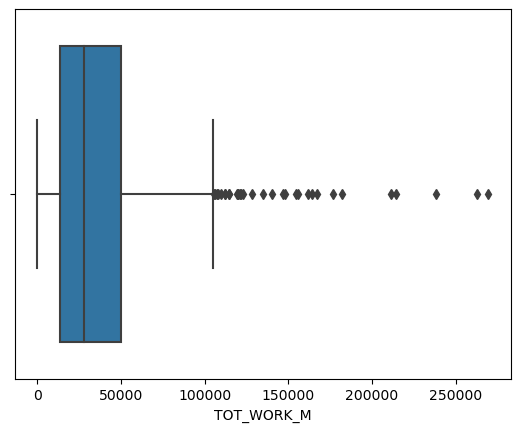

In [124]:
sns.boxplot(data=PCA,x='TOT_WORK_M')

In [127]:
PCAdf = PCA.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis = 1)

In [129]:
PCAdf

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3333,8154,11781,1146,1203,21,30,0,0,6916,...,32,47,0,0,0,0,0,0,32,47
636,10612,12346,21691,1544,1533,2234,4155,0,0,10292,...,155,337,3,14,38,130,4,23,110,170
637,1275,1549,2630,227,225,0,0,1012,1750,1187,...,104,134,9,4,2,6,17,47,76,77
638,3762,5200,8012,723,664,0,0,28,50,4206,...,136,172,24,44,11,21,1,4,100,103


In [137]:
#Scale the data
!pip install factor-analyzer

from scipy.stats import zscore
Pca_scaled = PCAdf.apply(zscore)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 7.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=c31bb9ed0c6db6f6f53faad8f924b9fc196460d2cc6173748f17f9330e065b22
  Stored in directory: /Users/pavithra/Library/Caches/pip/wheels/f1/2c/b5/fe5af210de2d70520ff6e657e66ab58d796c64dd5a78fbe5b6
Successfully built factor-analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.5.2
    Uninstalling

In [139]:
Pca_scaled

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,...,-0.914299,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,...,-0.831668,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,...,-0.865930,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,...,-0.844432,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660


<Axes: xlabel='TOT_M'>

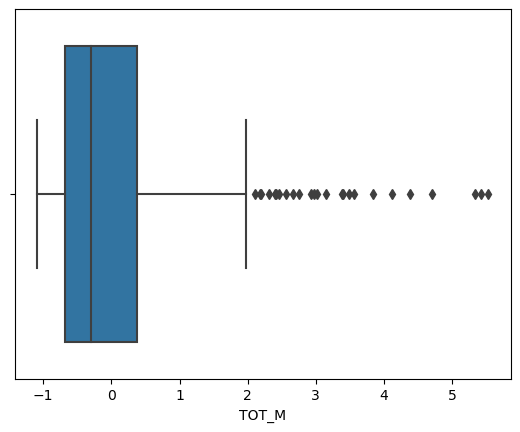

In [149]:
sns.boxplot(data=Pca_scaled,x='TOT_M')

<Axes: xlabel='TOT_F'>

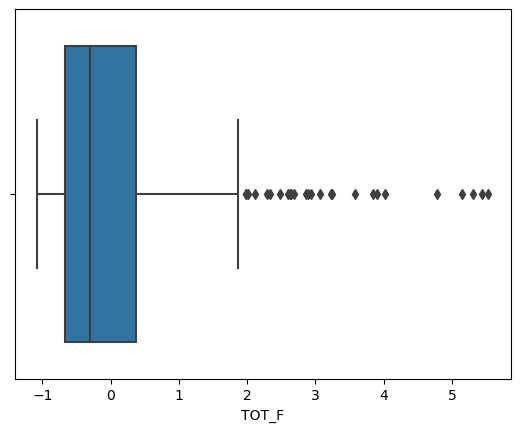

In [150]:
sns.boxplot(data=Pca_scaled,x='TOT_F')

<Axes: xlabel='M_LIT'>

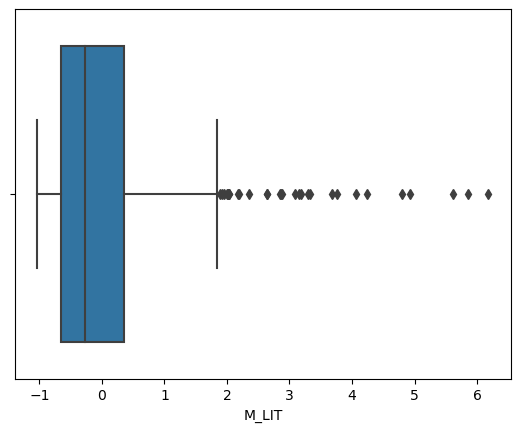

In [152]:
sns.boxplot(data=Pca_scaled,x='M_LIT')

<Axes: xlabel='F_LIT'>

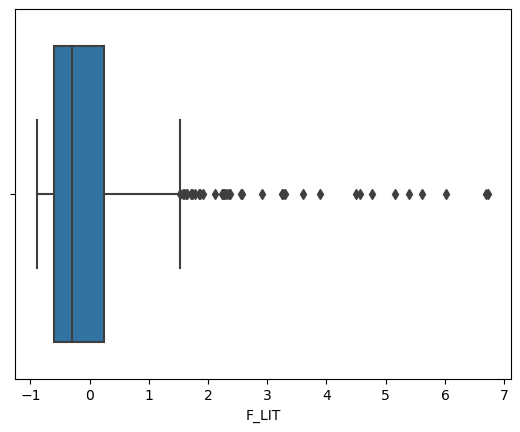

In [153]:
sns.boxplot(data=Pca_scaled,x='F_LIT')

<Axes: xlabel='TOT_WORK_M'>

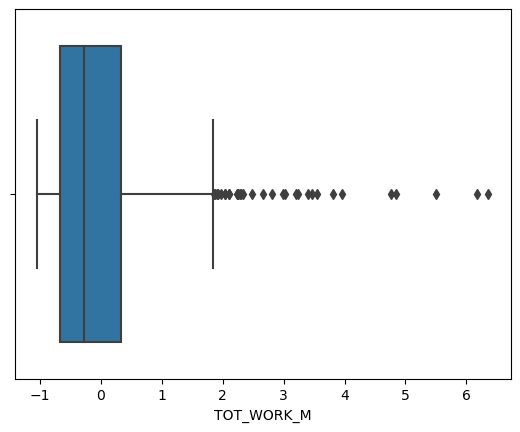

In [154]:
sns.boxplot(data=Pca_scaled,x='TOT_WORK_M')

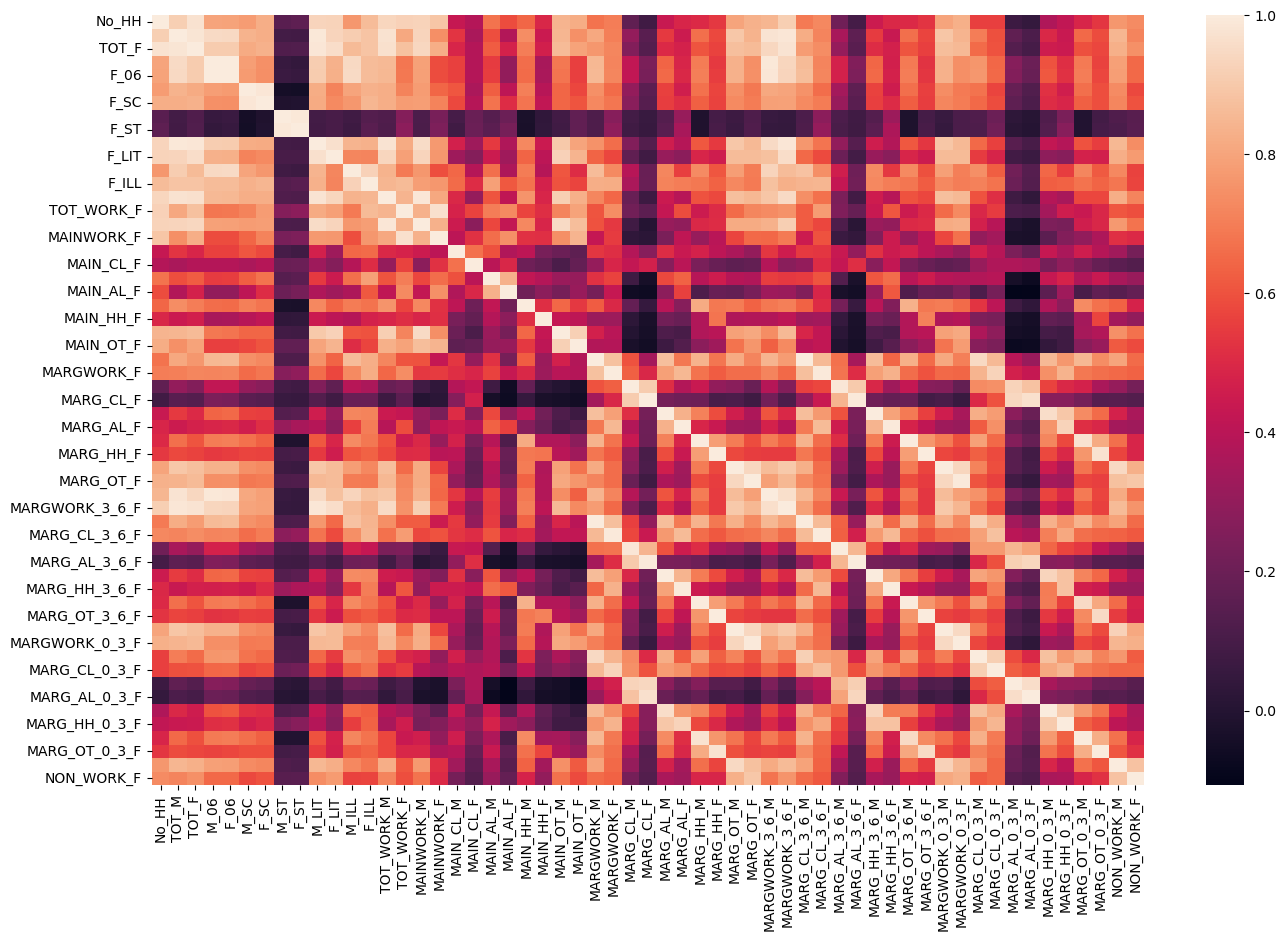

In [142]:
#Check for presence of correlations
plt.figure(figsize = (16,10))
sns.heatmap(Pca_scaled.corr());

In [143]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Pca_scaled)
p_value

/Users/pavithra/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [144]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Pca_scaled)
kmo_model

/Users/pavithra/anaconda3/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8039889932781813

In [158]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(Pca_scaled)

In [159]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.37643683,  0.15058437, ...,  0.03363703,
        -0.07959556, -0.02552519],
       [-0.        ,  0.2448199 ,  0.09383958, ..., -0.02638552,
        -0.01672564,  0.03567243],
       [-0.        , -0.09325898, -0.0110033 , ...,  0.01165739,
        -0.01279215, -0.00377366]])

In [160]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [161]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [183]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,index = Pca_scaled.columns)

In [184]:
df_extracted_loadings

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,3.048575e-01,-1.648761e-01,9.916129e-02,-4.745790e-02,2.258986e-02,2.424957e-01,3.027282e-01,3.764368e-01,2.448199e-01,-9.325898e-02
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,-2.246514e-01,1.097900e-01,2.357431e-01,2.785700e-01,-3.125276e-01,-3.041109e-01,-1.438505e-01,1.505844e-01,9.383958e-02,-1.100330e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,2.914335e-16,1.700029e-16,6.245005e-17,5.898060e-16,6.938894e-18,1.595946e-16,7.840950e-16,-2.081668e-17,7.459311e-16,-1.214306e-17
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,1.457168e-16,-6.314393e-16,-3.755676e-16,-2.602085e-16,1.526557e-16,8.118506e-16,-4.232725e-16,-5.689893e-16,-7.042977e-16,8.153200e-17
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,-1.665335e-16,-4.128642e-16,-2.810252e-16,-5.750608e-16,-4.310788e-16,-1.144917e-16,1.804112e-16,-3.816392e-16,5.655199e-16,1.908196e-16
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,4.857226e-16,3.087808e-16,2.949030e-16,4.100453e-16,5.247539e-16,8.326673e-17,-4.371503e-16,2.636780e-16,-7.563394e-16,2.428613e-17
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,-1.601367e-16,5.384148e-16,-1.769418e-16,9.714451e-17,-3.642919e-16,-2.606422e-16,1.634977e-16,4.857226e-16,-5.707240e-16,1.561251e-17
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,5.681219e-17,-4.362830e-16,1.474515e-16,-4.076600e-17,2.758210e-16,3.020587e-16,-1.639314e-16,-4.059253e-16,4.891920e-16,3.035766e-17
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,7.036538e-02,4.720471e-02,6.069743e-02,2.364240e-01,-2.405266e-01,-1.645640e-01,3.729324e-02,-1.338091e-01,-2.134706e-01,-5.415574e-01


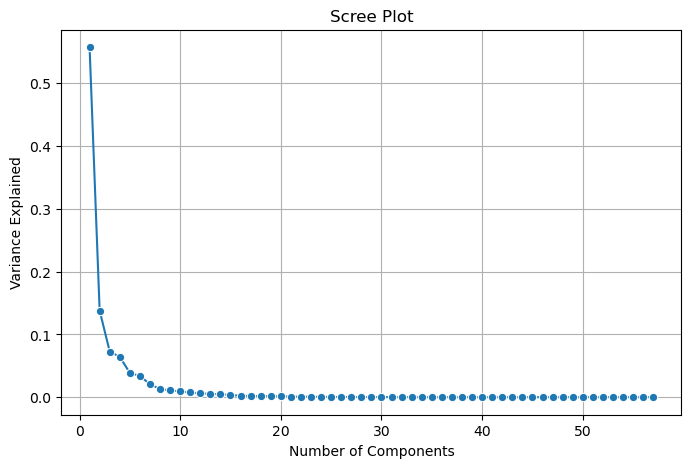

In [185]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()

plt.show()

In [186]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

90% variance...6 PC's

In [187]:
df_selected = df_extracted_loadings[[0,1, 2, 3, 4,5]]

In [188]:
new_column_names = {0:'PC1', 1:'PC2',2:'PC3',3: 'PC4',4:'PC5', 5:'PC6'}
df_selected.rename(columns=new_column_names, inplace=True)


/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_46053/3794520086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=new_column_names, inplace=True)


In [189]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


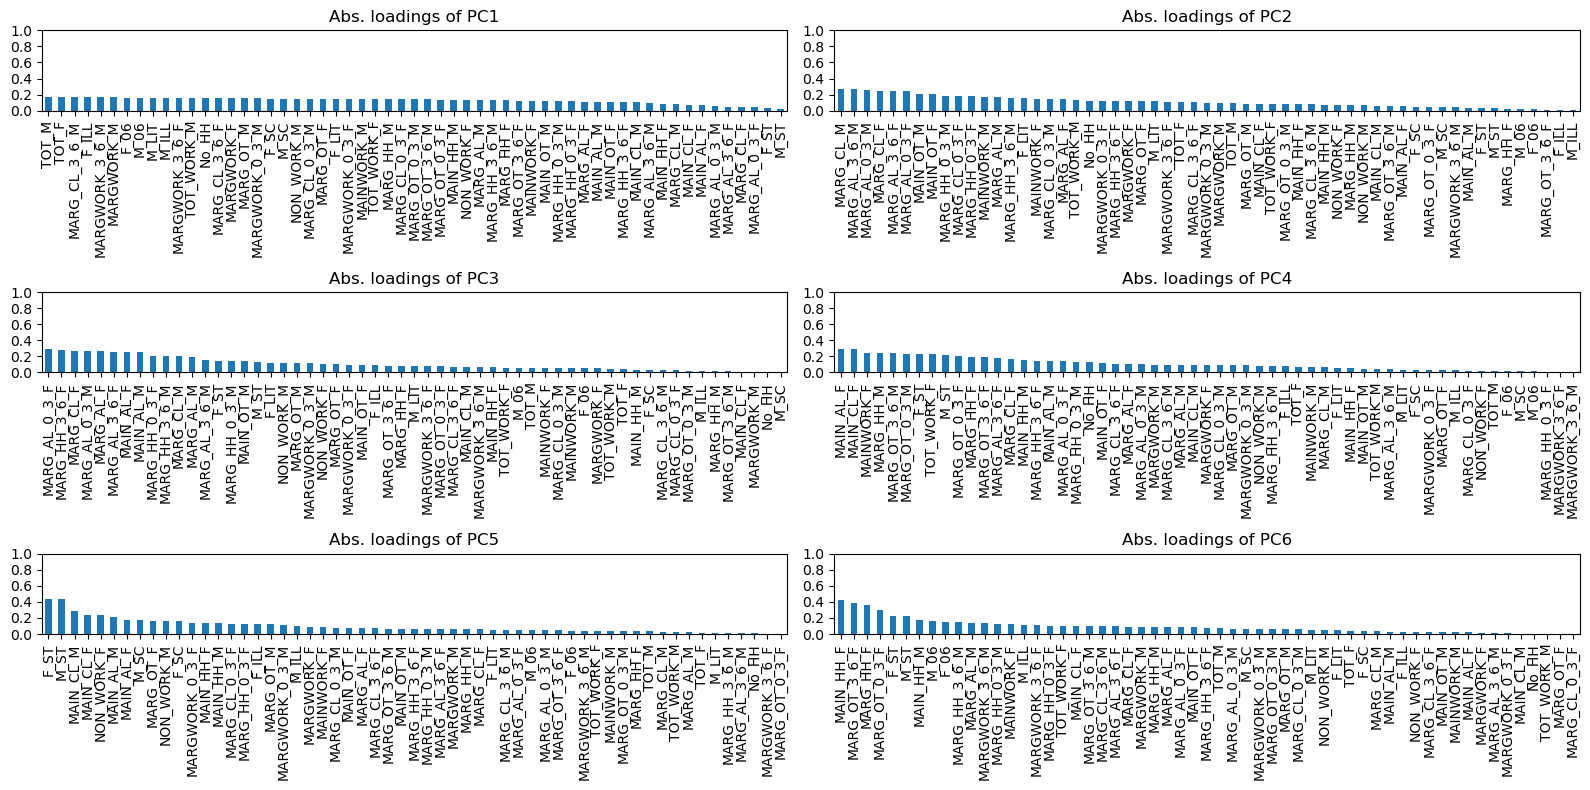

In [210]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (16,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

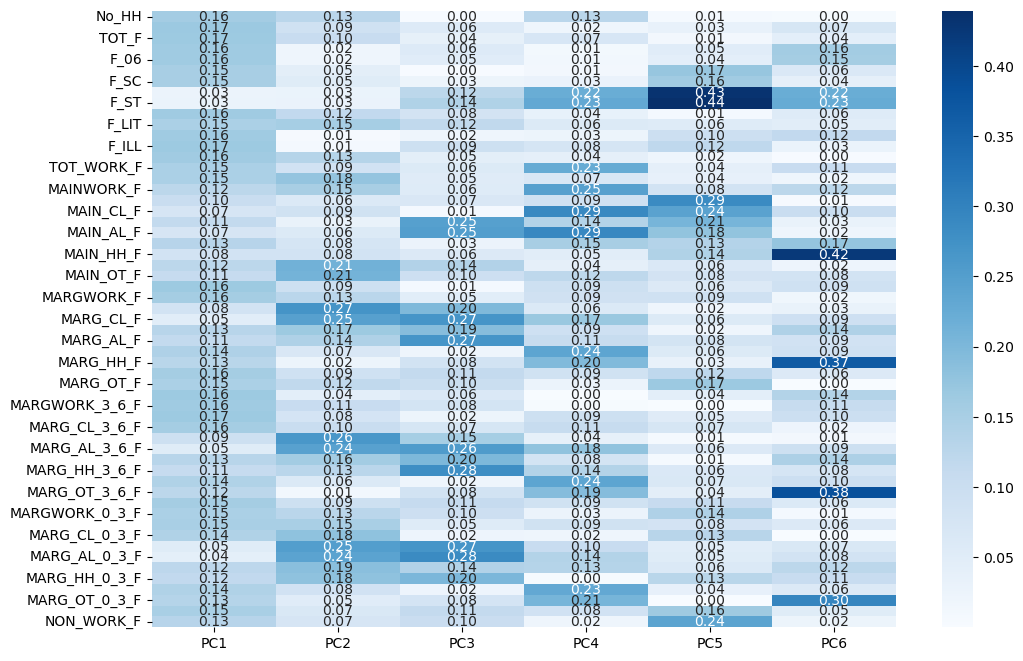

In [211]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [215]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(Pca_scaled)

In [216]:
pca_final

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

In [217]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
5,-3.319963,2.823865,3.058460,-0.447904,0.742445,0.634676
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455039
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002576


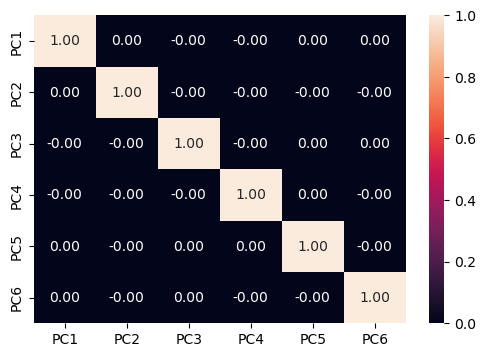

In [220]:
plt.figure(figsize = (6,4))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [237]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',Pca_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0